<a href="https://colab.research.google.com/github/AlexsonT/Prog_DS2_Growdev/blob/main/exercicios_aula_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### O dataset [clientes.csv](https://drive.google.com/file/d/1I4987Fvr0dy6DxE6-medv3MhbTWFyzjW/view) possui dados sobre clientes de uma determinada loja.Porém esse dataset possui alguns problemas e devem ser tratados antes de quaisquer processamentos. Você deve:
  ###### 1) Realizar a limpeza desses dados, sempre analisando qual a melhor decisão a ser tomada em cada situação de acordo com seu julgamento.
  ###### 2) Faça anotações do porquê de cada ação tomada para tratar a base de dados, explicando a decisão.
  ###### 3) Procure explicar quais as vantagens e/ou desvantagens de suas ações sobre o dataset.  
  
  
**Tome como base as funções `info()` e `describe()` e os processamentos de:**

● Duplicações  
● Inconsistências  
● Tipagem de dados  
● Outliers  
● Colunas desnecessárias  
● Valores faltantes  

## Imports

In [39]:
import pandas as pd
import numpy as np  

## Open Dataset

In [40]:
df = pd.read_csv('clientes.csv')

## Análise dos Dados

###### **Análise dos primeiros e dos últimos 10 dados do dataframe.**
* Com essa análise já é possível observar que, nesse caso, temos uma idade fora do padrão (acompanhada da palavra "anos").

* Também observa-se que o cpf está fora do padrão numérico e que contém muitos dígitos. 

* Ainda nota-se que temos no dataset uma coluna com nome completo e outra coluna com nome e sobrenome separado, algo que precisaria ser analisado levando em conta perante as necessidades de uso do dataframe, pois por conter as mesmas informações podem estar apenas utiliozando memória em vão.

In [41]:
df.head(10)

,cliente_nome_completo,cliente_cpf,cliente_idade,cliente_frequencia_compra,cliente_nome,cliente_sobrenome
0,Fernando Andrade,2.946012e+10,51,26,Fernando,Andrade
1,Vanessa Andrade,7.428947e+10,47,6,Vanessa,Andrade
2,Maria Barcelos,9.301411e+10,23 anos,91,Maria,Barcelos
3,Vanessa Carvalho,2.482485e+10,30,54,Vanessa,Carvalho
4,Ana Rodrigues,5.314509e+10,44,81,Ana,Rodrigues
5,Marcia Antunes,3.905199e+10,40,105,Marcia,Antunes
6,Andre Rodrigues,2.712804e+10,31,100,Andre,Rodrigues
7,Claudia Rodrigues,9.585728e+10,56,51,Claudia,Rodrigues
8,Pedro Rodrigues,2.590338e+10,58,87,Pedro,Rodrigues
9,Andre Antunes,6.481352e+10,48,97,Andre,Antunes


In [42]:
df.tail(10)

,cliente_nome_completo,cliente_cpf,cliente_idade,cliente_frequencia_compra,cliente_nome,cliente_sobrenome
992,Fernando Santos,9.185593e+10,37,75,Fernando,Santos
993,Maria Andrade,5.589949e+10,36,70,Maria,Andrade
994,Marcia Fernandes,1.591411e+10,18,11,Marcia,Fernandes
995,Osmar Rocha,9.373069e+10,36,25,Osmar,Rocha
996,Claudia Silva,6.602334e+10,54,69,Claudia,Silva
997,Vanessa Nunes,7.988690e+10,43,89,Vanessa,Nunes
998,Claudia Fernandes,6.854702e+10,58,11,Claudia,Fernandes
999,Valter Fernandes,2.490824e+10,51,94,Valter,Fernandes
1000,Leonardo Melo,8.286605e+10,20,10,Leonardo,Melo
1001,Ana Santos,8.457643e+10,51,7,Ana,Santos


###### **Verificando informações básicas com describe e info**.  

* Devido ao describe analisar colunas numéricas, podemos observar que temos apenas duas colunas que podem ser analisadas com esta função, isso ocorre porque as demais colunas provavelmente contém números e alguma informação com texto no mesmo dado. Essa informação também fica exposta na função info onde temos um item float64, um item int64 e os demais dados como object.   
* Também é notório na função describe que a coluna "cliente_frequencia_compra", possui um mínimo negativo, o que não faz muito sentido.
* Outro ponto que fica evidente na função info é que, em algumas colunas, temos itens não nulos com quantidade inferior ao total de dados, o que significa que temos dados não preenchidos nestas colunas. 
* Ainda é possível observar que na coluna "cliente_frequencia_compra" temos um desvio padrão considerado alto o que nos permite avaliar que a amostra é um tanto quanto dispera em seus dados. 



In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cliente_nome_completo      1002 non-null   object 
 1   cliente_cpf                1000 non-null   float64
 2   cliente_idade              1002 non-null   object 
 3   cliente_frequencia_compra  1002 non-null   int64  
 4   cliente_nome               1002 non-null   object 
 5   cliente_sobrenome          1001 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 47.1+ KB


In [44]:
df.describe()

,cliente_cpf,cliente_frequencia_compra
count,1.000000e+03,1002.000000
mean,4.971137e+10,49.941118
std,2.874325e+10,29.426274
min,2.277302e+08,-5.000000
25%,2.488739e+10,24.000000
50%,4.841568e+10,50.000000
75%,7.459796e+10,75.000000
max,9.988003e+10,150.000000


## Limpeza dos Dados

Verificando se há registros duplicados.

In [45]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
997     False
998     False
999     False
1000    False
1001    False
Length: 1002, dtype: bool

In [46]:
df.rename(columns = {'cliente_idade':'cliente_idade_2'}, inplace = True) #alternado o nome da coluna para editá-la.

In [49]:
df['cliente_idade'] = df.cliente_idade_2.str.split(' ').str.get(0) #criando nova coluna retirando a palavra anos.

In [50]:
df = df[['cliente_nome_completo',	'cliente_cpf',	'cliente_idade',	'cliente_frequencia_compra',	'cliente_nome',	'cliente_sobrenome']]

In [58]:
df['cliente_idade'] = pd.to_numeric(df['cliente_idade']) #alterando a coluna com idade par o tipo int64.
df['cliente_idade'] = df['cliente_idade'].astype(np.int16) # reduzindo o tamanho dos dados da coluna.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cliente_nome_completo      1002 non-null   object 
 1   cliente_cpf                1000 non-null   float64
 2   cliente_idade              1002 non-null   int16  
 3   cliente_frequencia_compra  1002 non-null   int64  
 4   cliente_nome               1002 non-null   object 
 5   cliente_sobrenome          1001 non-null   object 
dtypes: float64(1), int16(1), int64(1), object(3)
memory usage: 41.2+ KB


In [59]:
df.head()

,cliente_nome_completo,cliente_cpf,cliente_idade,cliente_frequencia_compra,cliente_nome,cliente_sobrenome
0,Fernando Andrade,2.946012e+10,51,26,Fernando,Andrade
1,Vanessa Andrade,7.428947e+10,47,6,Vanessa,Andrade
2,Maria Barcelos,9.301411e+10,23,91,Maria,Barcelos
3,Vanessa Carvalho,2.482485e+10,30,54,Vanessa,Carvalho
4,Ana Rodrigues,5.314509e+10,44,81,Ana,Rodrigues


 **Outliers**

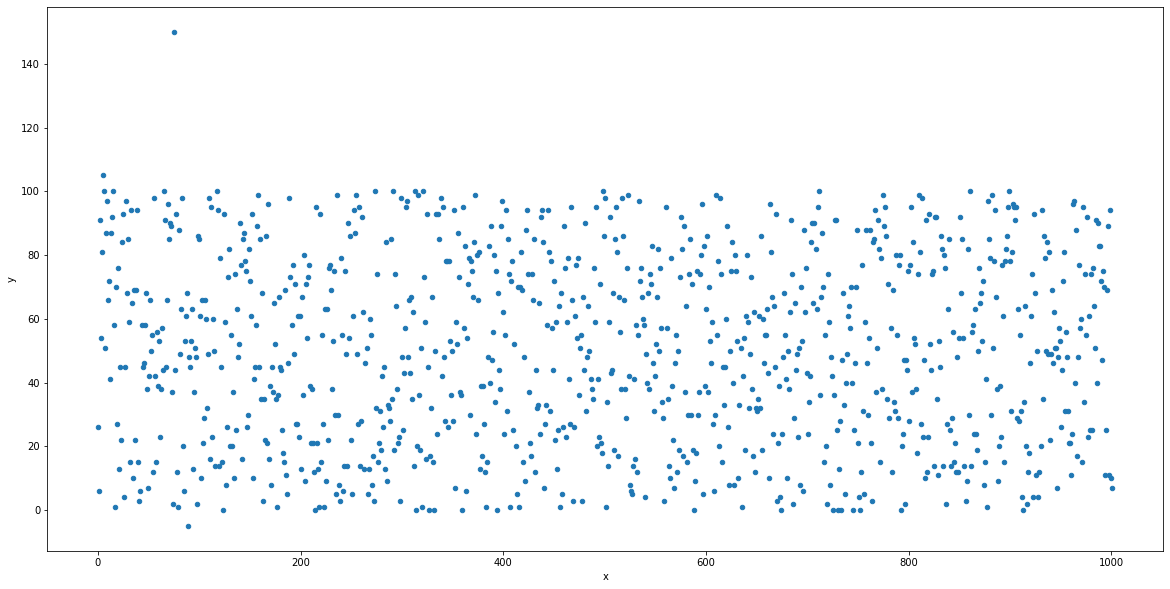

In [62]:
y = df['cliente_frequencia_compra']
x = pd.Series(list(range(y.shape[0])))

new_df = pd.DataFrame({'x': x, 'y': y})

new_df.plot(x='x',y='y',kind='scatter',figsize=(20, 10))

In [66]:
def exclui_outliers(DataFrame, col_name):
    intervalo = 5*DataFrame[col_name].std()
    media = DataFrame[col_name].mean()
    DataFrame.loc[df[col_name] < (media - intervalo), col_name] = np.nan
    DataFrame.loc[df[col_name] > (media + intervalo), col_name] = np.nan

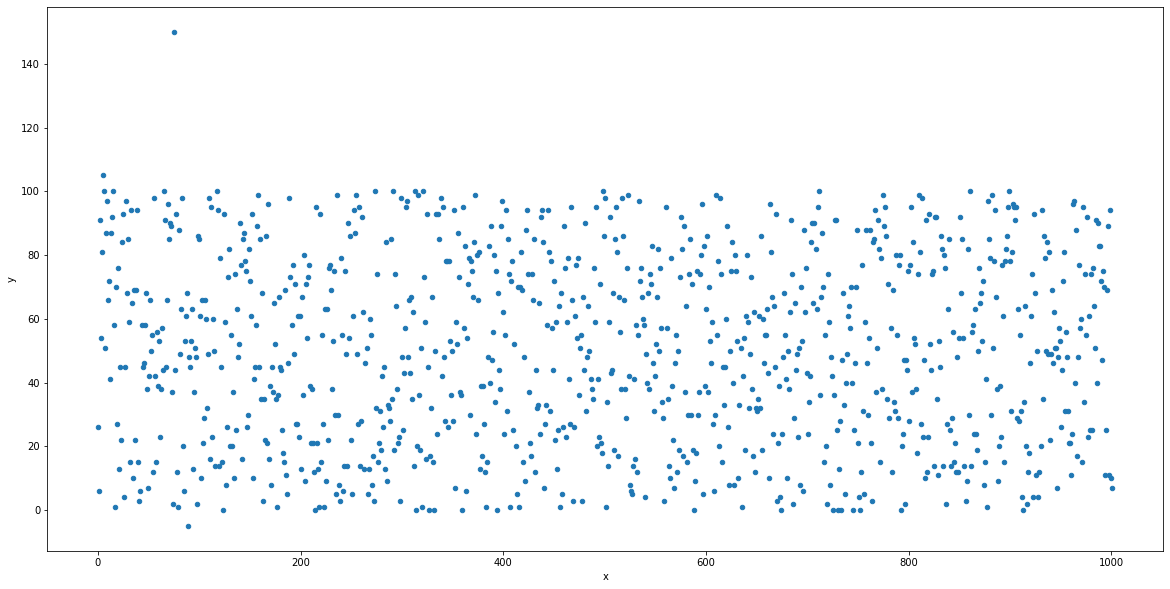

In [67]:
y = df['cliente_frequencia_compra']
x = pd.Series(list(range(y.shape[0])))

new_df = pd.DataFrame({'x': x, 'y': y})

new_df.plot(x='x',y='y',kind='scatter',figsize=(20, 10))

**Excluindo os valores faltantes.**